<a href="https://colab.research.google.com/github/MitPitt/msu-nn-special-course/blob/main/%D0%97%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Требуется обучить модель на основе SVM для распознавания рукописных цифр из набора MNIST. 

Набор данных MNIST можно загрузить из пакета keras.  

В качестве модели применяется LinearSVC. В качестве вектора признаков можно взять линеаризованное изображение, значения элементов от 0 (черный) до 1 (белый). 

Результатом второго задания является записная книжка Python с подготовкой данных, процессом обучения, ручной проверкой качества распознавания на нескольких образцах и расчётом confusion matrix.   

## Загрузка данных

In [1]:
import keras

Массивы X содержат grayscale изображения цифр, массивы Y - метки, т.е. значения цифр.

In [2]:
from keras.datasets import mnist
(train_X, train_y), (test_X, test_y) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


Размер каждого изображения 28x28, в массиве для обучения 60000 элементов

In [3]:
train_X.shape

(60000, 28, 28)

Отображаем 6-й элемент для обучения

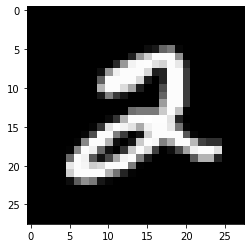

In [4]:
from matplotlib import pyplot
pyplot.figure(2, figsize=(4, 4))
pyplot.imshow(train_X[5], cmap=pyplot.get_cmap('gray'))
pyplot.show()

Значение метки (цифра) для 6-го элемента 

In [5]:
train_y[5]

2

## Обучение модели

In [6]:
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [46]:
def fit(X, y, clf):
    X = X.reshape(-1,784) / 255
    clf.fit(X, y)

def predict(X, clf):
    X = X.reshape(-1,784) / 255
    return clf.predict(X)

def draw_and_predict(X, y, clf):
    pyplot.figure(2, figsize=(4, 4))
    pyplot.imshow(X, cmap=pyplot.get_cmap('gray'))
    pyplot.show()
    print('true: {}, predicted: {}'.format(y, predict(X, clf)))

In [32]:
classifier = LinearSVC()
fit(train_X, train_y, classifier)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [55]:
pred_y_train = predict(train_X, classifier)

confusion_matrix(train_y, pred_y_train, labels=range(0,10))

array([[5800,    1,   13,    9,    9,   18,   26,    4,   36,    7],
       [   1, 6602,   30,   11,    7,   23,    2,   11,   47,    8],
       [  39,   45, 5419,   84,   57,   26,   57,   71,  141,   19],
       [  20,   26,  155, 5493,   11,  172,   20,   54,  118,   62],
       [   9,   23,   30,    7, 5484,   15,   30,   14,   53,  177],
       [  53,   23,   40,  163,   61, 4786,   96,   17,  121,   61],
       [  30,   12,   29,    3,   26,   77, 5712,    2,   24,    3],
       [  12,   21,   56,   13,   52,   10,    6, 5907,   17,  171],
       [  47,  131,   74,  147,   44,  164,   49,   27, 5077,   91],
       [  25,   19,   28,  105,  182,   45,    2,  195,   48, 5300]])

## Проверим на тестовом подмножестве

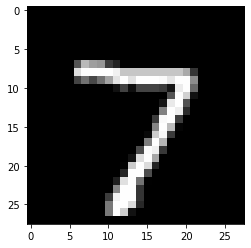

true: 7, predicted: [7]


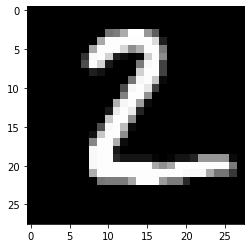

true: 2, predicted: [2]


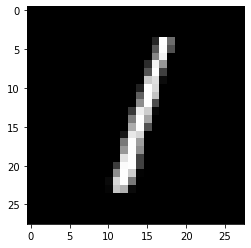

true: 1, predicted: [1]


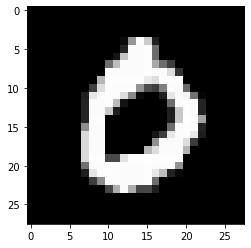

true: 0, predicted: [0]


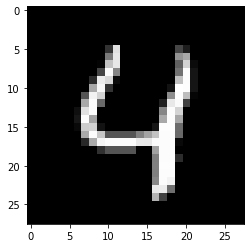

true: 4, predicted: [4]


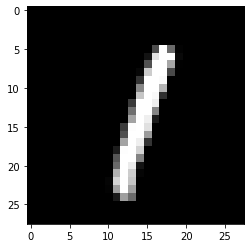

true: 1, predicted: [1]


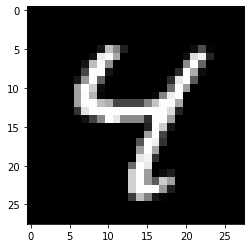

true: 4, predicted: [4]


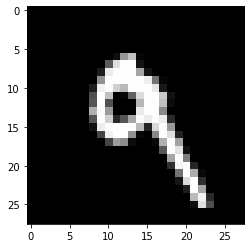

true: 9, predicted: [9]


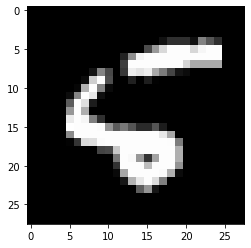

true: 5, predicted: [6]


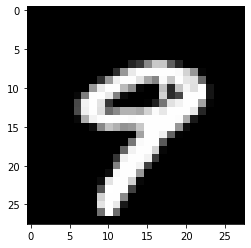

true: 9, predicted: [9]


In [52]:
for i in range(0,10):
    draw_and_predict(test_X[i], test_y[i], classifier)

Посмотрим еще неугаданные цифры:

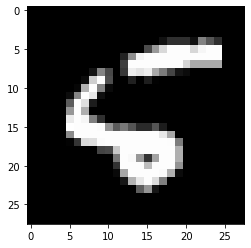

true: 5, predicted: [6]


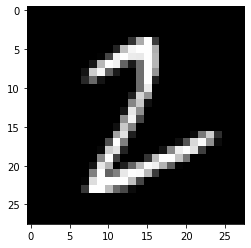

true: 2, predicted: [3]


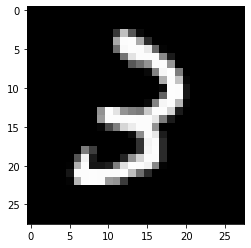

true: 3, predicted: [2]


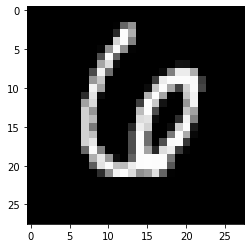

true: 6, predicted: [2]


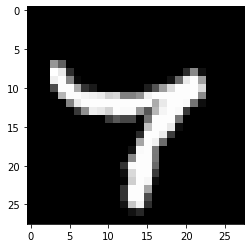

true: 7, predicted: [4]


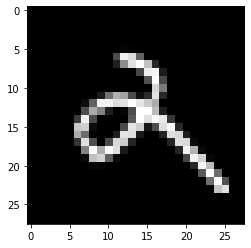

true: 2, predicted: [9]


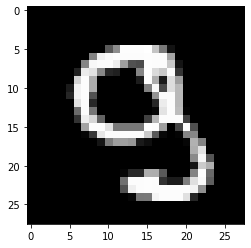

true: 9, predicted: [8]


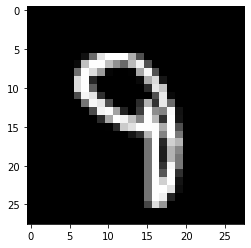

true: 9, predicted: [3]


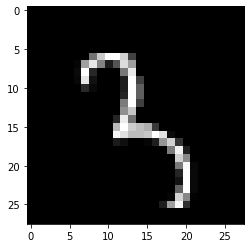

true: 3, predicted: [5]


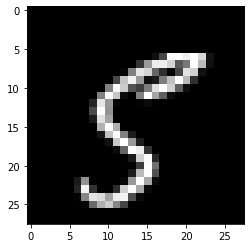

true: 5, predicted: [7]


In [53]:
i = 0
j = 0
while j < 10:
    if predict(test_X[i], classifier) != test_y[i]:
        j += 1
        draw_and_predict(test_X[i], test_y[i], classifier)
    i += 1

Довольно кривые примеры

In [54]:
pred_y_test = predict(test_X, classifier)

confusion_matrix(test_y, pred_y_test, labels=range(0,10))

array([[ 962,    0,    2,    1,    1,    4,    5,    3,    1,    1],
       [   0, 1112,    3,    2,    0,    1,    5,    1,   11,    0],
       [  11,   11,  914,   18,   10,    4,   13,   12,   36,    3],
       [   4,    0,   19,  918,    2,   22,    5,   12,   19,    9],
       [   1,    4,    5,    4,  913,    0,    9,    3,    5,   38],
       [   9,    2,    0,   39,   12,  769,   17,    7,   29,    8],
       [   7,    4,    7,    2,    5,   21,  909,    1,    2,    0],
       [   2,    8,   23,    5,    7,    1,    1,  948,    4,   29],
       [  11,   13,    8,   21,   14,   31,    8,   13,  843,   12],
       [   7,    8,    2,   15,   31,   12,    0,   26,   12,  896]])

По матрице как трейна, так и теста, видно, например, что единицу сложно с чем-то спутать, а вот пятерка хромает, что логично — у нее есть несколько способов начертания.